In [1]:
from collections import defaultdict
import datetime
import graphviz
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import pandas as pd
import seaborn as sns
from tqdm import tqdm
sns.set()
path = os.path.expanduser('~/Projects/capstone-two/data/processed/Final_Clean_Harbor_Water_Quality.csv', )
wq_df = pd.read_csv(path, parse_dates=['Sample Date'], index_col=0)

In [2]:
phoG = nx.MultiGraph()
pho_df = wq_df[wq_df['Top Ortho-Phosphorus (mg/L) Failure'] == 1]
pho_df = pho_df.reset_index(drop=True)


for i, row in tqdm(pho_df.iterrows()):
    # Sample Date is at index 2
    month = row['Sample Date'].month
    year = row['Sample Date'].year
    for row2 in pho_df.drop(index=i).itertuples():
        if row2[2].month == month and row2[2].year == year:
            # Sampling Location is at index 1
            phoG.add_edge(row['Sampling Location'], row2[1],
                           dates=(row['Sampling Location'], row2[2])
                          )
            

1814it [00:42, 42.80it/s]


C:\Users\Drew\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


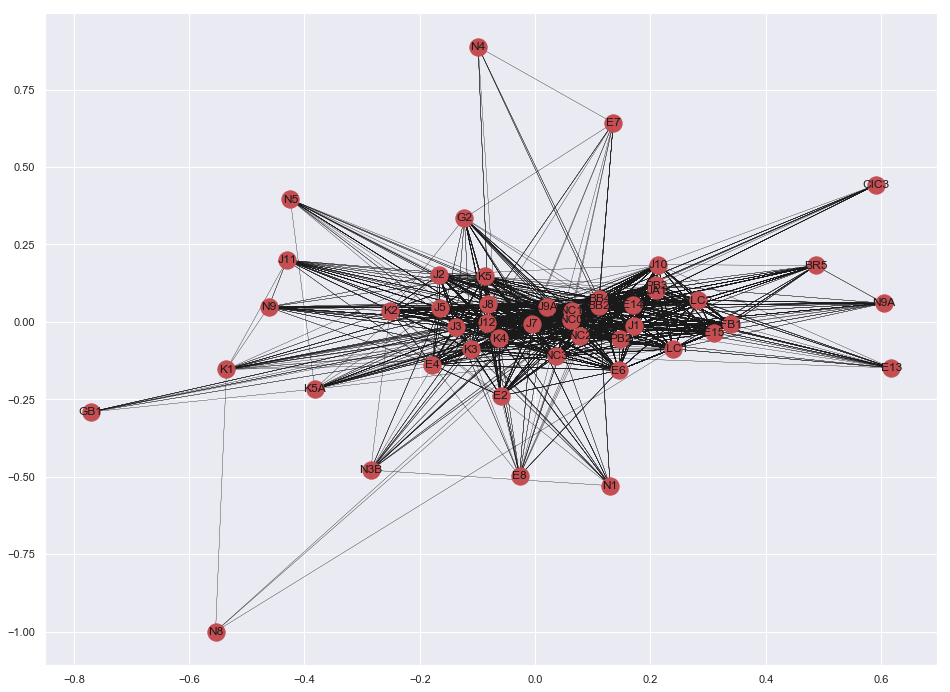

In [3]:
_ = plt.figure(figsize=(16, 12))
_ = nx.drawing.nx_pylab.draw_networkx(phoG, width=0.2)
_ = plt.show()

This plot is very messy. I'm going to key in on the center of it.

In [5]:
sorted_centrality = sorted(nx.degree_centrality(phoG).items(), key = lambda x : x[1], reverse=True)
sorted_centrality[:10]

[('E14', 205.52173913043478),
 ('NC0', 131.47826086956522),
 ('BB2', 129.1304347826087),
 ('J7', 123.13043478260869),
 ('BB4', 110.73913043478261),
 ('J12', 98.21739130434783),
 ('J9A', 85.91304347826086),
 ('J1', 71.69565217391305),
 ('NC1', 71.52173913043478),
 ('J8', 54.34782608695652)]

The above are the most commonly overlapped sites for ortho-phosphorus test failures. I wonder what their network would look like if it was only them?

In [6]:
def create_wq_network(df, fail_col):
    '''Takes a dataframe and creates a network out of the 
       different sites within based on fail_col.'''
    
    pass

Absolute value of date 1 - date 2. if less than 30 then draw edge

Looking at the total number of failures for each 

In [7]:
wq_df.sum().iloc[33:41]

Top Ammonium (mg/L) Failure                                                             147
Top Active Chlorophyll 'A' (µg/L) Failure                                              3628
CTD (conductivity, temperature, depth profiler) Top Dissolved Oxygen (mg/L) Failure    1764
Top Enterococci Bacteria (Cells/100mL) Failure                                         2186
Top Fecal Coliform Bacteria (Cells/100mL) Failure                                      1291
Top Total Kjeldhal Nitrogen (mg/L) Failure                                               11
Top PH Failure                                                                            7
Top Ortho-Phosphorus (mg/L) Failure                                                    1814
dtype: object

Create a graph of the site failures.

In [8]:
site_fail_df = wq_df.groupby('Sampling Location').mean().iloc[:, 28:39].drop(columns='Weather Condition (Dry or Wet)_W')

,Long,Lat,Top Ammonium (mg/L) Failure,Top Active Chlorophyll 'A' (µg/L) Failure,"CTD (conductivity, temperature, depth profiler) Top Dissolved Oxygen (mg/L) Failure",Top Enterococci Bacteria (Cells/100mL) Failure,Top Fecal Coliform Bacteria (Cells/100mL) Failure,Top Total Kjeldhal Nitrogen (mg/L) Failure,Top PH Failure,Top Ortho-Phosphorus (mg/L) Failure
Sampling Location,,,,,,,,,,
BB2,-73.822160,40.660040,0.266094,0.304721,0.351931,0.377682,0.442060,0.021459,0.0,0.652361
BB4,-73.823160,40.651640,0.032389,0.336032,0.064777,0.145749,0.291498,0.000000,0.0,0.497976
BR5,-73.871332,40.813668,0.000000,0.111607,0.026786,0.129464,0.071429,0.000000,0.0,0.013393
CIC3,-73.994168,40.580332,0.000000,0.051383,0.015810,0.181818,0.335968,0.000000,0.0,0.003953
E10,-73.765333,40.843667,0.000000,0.091575,0.126374,0.001832,0.000000,0.000000,0.0,0.000000


Next I create graphs using the average value of the failure column to alter the size of each marker. I used averages to control for differences in sampling frequency.

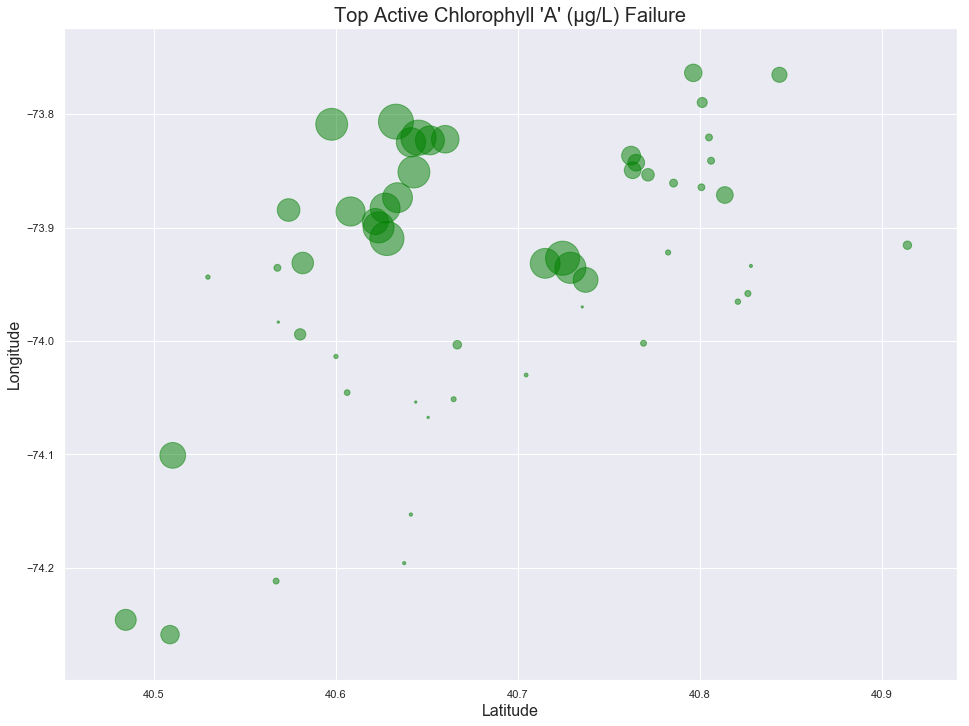

In [16]:
_ = plt.figure(figsize=(16, 12))
_ = plt.scatter(x=site_fail_df['Lat'], y=site_fail_df['Long'], 
                alpha=.5, c='green',
                s=site_fail_df['Top Active Chlorophyll \'A\' (µg/L) Failure']*2500)
_ = plt.title('Top Active Chlorophyll \'A\' (µg/L) Failure', fontsize=20)
_ = plt.xlabel('Latitude', fontsize=16)
_ = plt.ylabel('Longitude', fontsize=16)

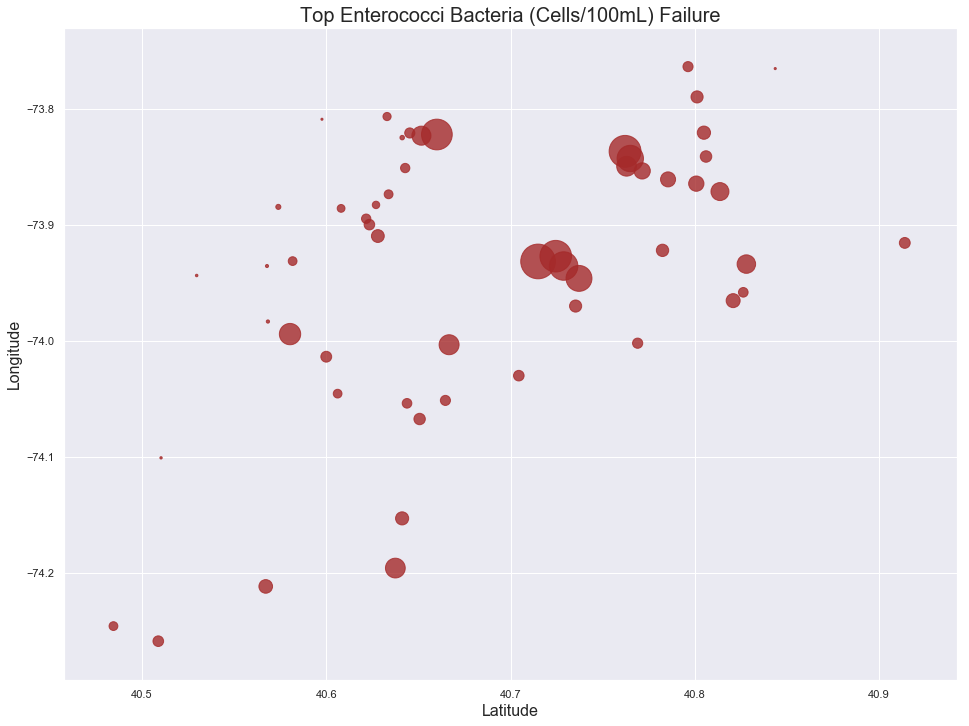

In [17]:
_ = plt.figure(figsize=(16, 12))
_ = plt.scatter(x=site_fail_df['Lat'], y=site_fail_df['Long'], 
                alpha=.8, c='brown',
                s=site_fail_df['Top Enterococci Bacteria (Cells/100mL) Failure']*2500)
_ = plt.title('Top Enterococci Bacteria (Cells/100mL) Failure', fontsize=20)
_ = plt.xlabel('Latitude', fontsize=16)
_ = plt.ylabel('Longitude', fontsize=16)

# want to add labels to top 5 sites

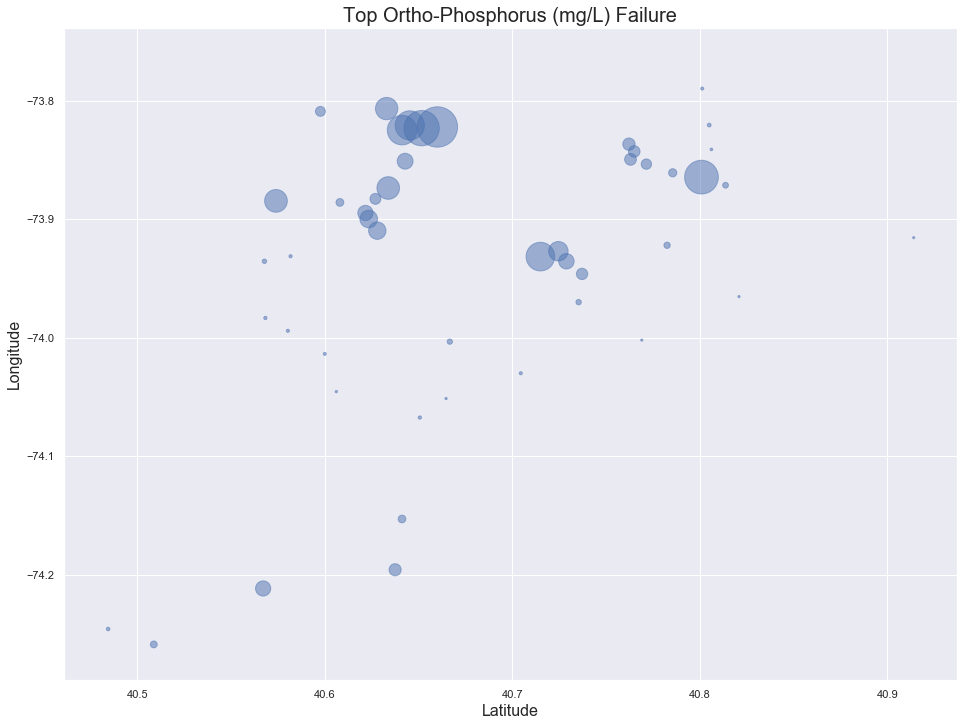

In [18]:
_ = plt.figure(figsize=(16, 12))
_ = plt.scatter(x=site_fail_df['Lat'], y=site_fail_df['Long'], 
                alpha=.5,
                s=site_fail_df['Top Ortho-Phosphorus (mg/L) Failure']*2500)
_ = plt.title('Top Ortho-Phosphorus (mg/L) Failure', fontsize=20)
_ = plt.xlabel('Latitude', fontsize=16)
_ = plt.ylabel('Longitude', fontsize=16)

# want to add labels to top 5 sites

In [ ]:
# Create same graphs but comparing monthly, dry vs wet,